In [63]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [64]:
# 데이터 로드

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_valid, y_valid) = fashion_mnist.load_data()

In [65]:
# shape 확인
x_train.shape, x_valid.shape

((60000, 28, 28), (10000, 28, 28))

In [66]:
# 값 확인

x_train.min(), x_train.max()

(0, 255)

In [67]:
# 정규화

x_train = x_train / 255.0
x_valid = x_valid / 255.0

In [68]:
# 값 확인

x_train.min(), x_train.max()

(0.0, 1.0)

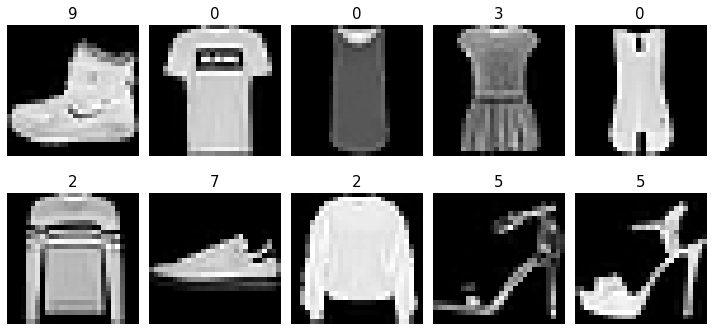

In [69]:
# 샘플 데이터 시각화

fig, axes = plt.subplots(2, 5)
fig.set_size_inches(10, 5)

for i in range(10):
    axes[i//5, i%5].imshow(x_train[i], cmap='gray')
    axes[i//5, i%5].set_title(str(y_train[i]), fontsize=15)
    plt.setp( axes[i//5, i%5].get_xticklabels(), visible=False)
    plt.setp( axes[i//5, i%5].get_yticklabels(), visible=False)
    axes[i//5, i%5].axis('off')

plt.tight_layout()
plt.show()

In [70]:
tf.keras.backend.set_floatx('float64')

In [71]:
# 모델 정의

model = Sequential([
    # Flatten으로 shape 펼치기
    Flatten(input_shape=(28, 28)),
    # Dense Layer
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    # Classification을 위한 Softmax 
    Dense(10, activation='softmax'),
])

In [72]:
# 모델 확인

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [73]:
# y_train값 확인

y_train[0]

9

In [74]:
# 원핫인코딩

print(tf.one_hot(y_train[0], 10))

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32)


In [75]:
# 모델 컴파일

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [76]:
# 모델 체크포인트 생성

checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [77]:
# 모델 학습

model.fit(x_train, y_train,
          validation_data=(x_valid, y_valid),
          epochs=20,
          callbacks=[checkpoint],
)

Epoch 1/20
1875/1875 [==============================] - 80s 42ms/step - loss: 0.6349 - acc: 0.7689 - val_loss: 0.4641 - val_acc: 0.8408

Epoch 00001: val_loss improved from inf to 0.46415, saving model to my_checkpoint.ckpt
Epoch 2/20
1875/1875 [==============================] - 94s 50ms/step - loss: 0.3761 - acc: 0.8635 - val_loss: 0.3938 - val_acc: 0.8588

Epoch 00002: val_loss improved from 0.46415 to 0.39380, saving model to my_checkpoint.ckpt
Epoch 3/20
 921/1875 [=============>................] - ETA: 46s - loss: 0.3403 - acc: 0.8731

KeyboardInterrupt: 

In [ ]:
# 저장된 가중치값 로드

model.load_weights(checkpoint_path)

In [ ]:
# 검증

model.evaluate(x_valid, y_valid)